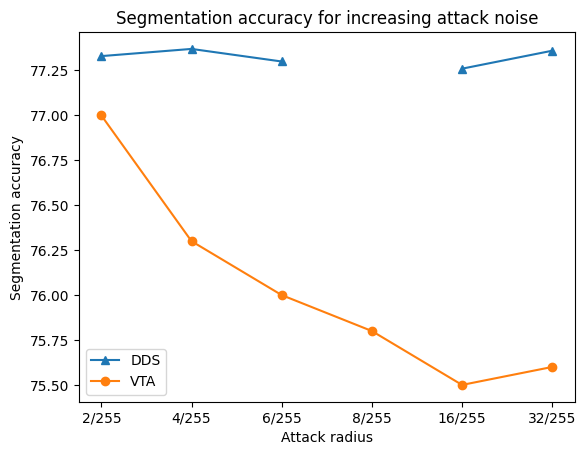

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = ["2/255", "4/255", "6/255", "8/255", "16/255", "32/255"]
y1 = [77.33, 77.37, 77.30, None, 77.26, 77.36]
y2 = [77, 76.3, 76, 75.8, 75.5, 75.6]

plt.title("Segmentation accuracy for increasing attack noise")
plt.xlabel("Attack radius")
plt.ylabel("Segmentation accuracy")
plt.plot(x, y1, marker="^")
plt.plot(x, y2, marker="o")
plt.legend(["DDS", "VTA"])
plt.show()

# Perturbations

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# get a list of directories under baselines/ViT/experiments/perturbations
path = 'FViT-main/baselines/ViT/experiments/perturbations/'
all_directories = os.listdir(path)
if '.DS_Store' in all_directories:
    all_directories.remove('.DS_Store')
pos_directories = sorted([d for d in all_directories if 'pos' in d[-3:]])
neg_directories = sorted([d for d in all_directories if 'neg' in d[-3:]])
print(all_directories)
print(pos_directories)
print(neg_directories)

['attn_gradcam_pos', 'rollout_neg', 'transformer_attribution_neg', 'attn_last_layer_neg', 'full_lrp_neg', 'dds_pos', 'transformer_attribution_pos', 'attn_gradcam_neg', 'rollout_pos', 'full_lrp_pos', 'dds_neg', 'attn_last_layer_pos']
['attn_gradcam_pos', 'attn_last_layer_pos', 'dds_pos', 'full_lrp_pos', 'rollout_pos', 'transformer_attribution_pos']
['attn_gradcam_neg', 'attn_last_layer_neg', 'dds_neg', 'full_lrp_neg', 'rollout_neg', 'transformer_attribution_neg']


In [10]:
sub_path_prefix = 'top/not_ablation/experiment_0'
all_files = {}
for directory in all_directories:
    subpath = os.path.join(path, directory, sub_path_prefix)
    directory_files_content = {}
    for file in os.listdir(subpath):
        file_path = os.path.join(subpath, file)
        if file[-3:] == 'npy':
            directory_files_content[file] = np.load(file_path)
        all_files[directory] = directory_files_content


In [12]:
unique_filenames = set()
for directory in all_files:
    for file in all_files[directory]:
        unique_filenames.add(file)
print(unique_filenames)

{'model_dissimilarities.npy', 'perturbations_hits.npy', 'perturbations_logit_diff.npy', 'perturbations_prob_diff.npy', 'perturbations_dissimilarities.npy', 'model_hits.npy'}


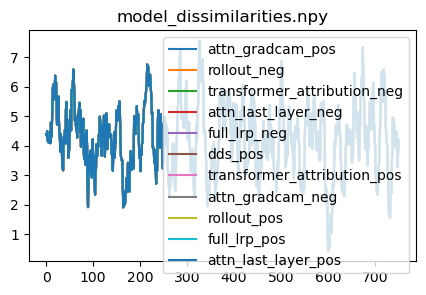

ValueError: Image size of 439x176326 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 500x300 with 1 Axes>

KeyboardInterrupt: 

In [22]:
for u_name in unique_filenames:
    # line plot of all files, labeled by the directory name
    fig, ax = plt.subplots()
    plt.title(u_name)
    # set image size
    fig.set_size_inches(5, 3)
    # plt.xlabel("Epoch")
    # plt.ylabel("Value")
    for directory in all_files:
        if u_name in all_files[directory]:
            # smooth plot
            data = all_files[directory][u_name]
            if len(data) > 10:
                data = np.convolve(data, np.ones(10)/10, mode='valid')
            ax.plot(data, label=directory)
    plt.legend()
    plt.show()